# Análisis del Funnel de Ventas para Plataforma de Crowdfunding Inmobiliario

## Introducción

El presente *notebook* tiene como objetivo principal realizar un análisis exhaustivo del funnel (embudo) de ventas de nuestra plataforma fintech de crowdfunding inmobiliario. A través de este análisis, buscaremos identificar puntos clave de conversión, posibles cuellos de botella y áreas de oportunidad para optimizar el recorrido de nuestros usuarios, desde el primer contacto hasta la inversión final.

Para llevar a cabo este estudio, se utilizarán herramientas estándar en el análisis de datos como **Python**, junto con las librerías **pandas** para la manipulación y análisis de datos, y **matplotlib/seaborn** para la visualización de resultados.

En el dinámico sector fintech, y particularmente en el crowdfunding inmobiliario, comprender y optimizar el funnel de ventas es crucial. Un análisis detallado nos permite tomar decisiones basadas en datos para mejorar la experiencia del usuario, incrementar las tasas de conversión en cada etapa y, en última instancia, maximizar la eficiencia de nuestras estrategias de adquisición y retención de inversionistas. Esta aproximación analítica es fundamental para el crecimiento sostenible y la competitividad de la plataforma.

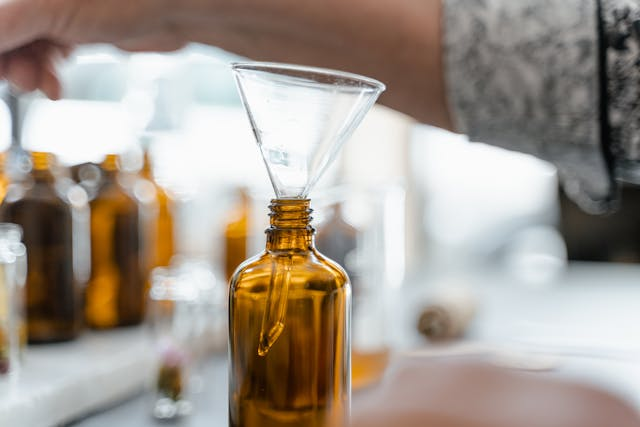

In [45]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtención de Datos
Los datos utilizados en este análisis son enteramente ficticios (*dummy data*), creados con propósitos exclusivamente educativos y demostrativos.

In [46]:
#Mostramos las primeras filas
df = pd.read_csv('/content/drive/MyDrive/Briq_vacante/funnel.csv', parse_dates=['Fecha_Solicitud', 'Fecha_Etapa','Fecha_Inicio_Campana','Fecha_Cierre_Campana'])
df.head()

,ID_Proyecto,Nombre_Proyecto,Desarrollador,Tipo_Proyecto,Region_Proyecto,Fecha_Solicitud,Monto_Solicitado_MXN,Etapa_Funnel,Fecha_Etapa,Responsable,...,Tasa_Interes_Propuesta,Plazo_Meses,Publicado_Plataforma,ID_Campana,Fecha_Inicio_Campana,Meta_Campana_MXN,Monto_Fondeado_Campana_MXN,Fecha_Cierre_Campana,Estatus_Campana,Total_Inversionistas_Campana
0,PROY001,Torres del Valle,Constructora Horizonte SA,Residencial Vertical,CDMX,2024-01-15,15000000,Solicitud Recibida,2024-01-15,Laura Martinez,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
1,PROY001,Torres del Valle,Constructora Horizonte SA,Residencial Vertical,CDMX,2024-01-15,15000000,Analisis Viabilidad,2024-01-20,Laura Martinez,...,16.5,24.0,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
2,PROY001,Torres del Valle,Constructora Horizonte SA,Residencial Vertical,CDMX,2024-01-15,15000000,Aprobado Comite,2024-01-28,Comite Inversion,...,16.5,24.0,Si,CAMP001,2024-02-05,7500000.0,7500000.0,2024-02-20,Fondeada Exitosamente,85.0
3,PROY001,Torres del Valle,Constructora Horizonte SA,Residencial Vertical,CDMX,2024-01-15,15000000,En Fondeo (Camp. 2),2024-02-22,Laura Martinez,...,16.5,24.0,Si,CAMP002,2024-02-22,7500000.0,7500000.0,2024-03-10,Fondeada Exitosamente,92.0
4,PROY001,Torres del Valle,Constructora Horizonte SA,Residencial Vertical,CDMX,2024-01-15,15000000,Fondeado Totalmente,2024-03-10,Laura Martinez,...,16.5,24.0,Si,NaN,NaT,NaN,NaN,NaT,NaN,NaN


# Definición de Etapas del Funnel y Conteo de Usuarios

Para comprender la estructura de nuestro embudo de ventas, es fundamental identificar el número de etapas presentes en el conjunto de datos, así como cuantificar el volumen de usuarios en cada una de ellas. Este paso inicial nos proporcionará una visión general de la progresión de los usuarios a través del funnel.

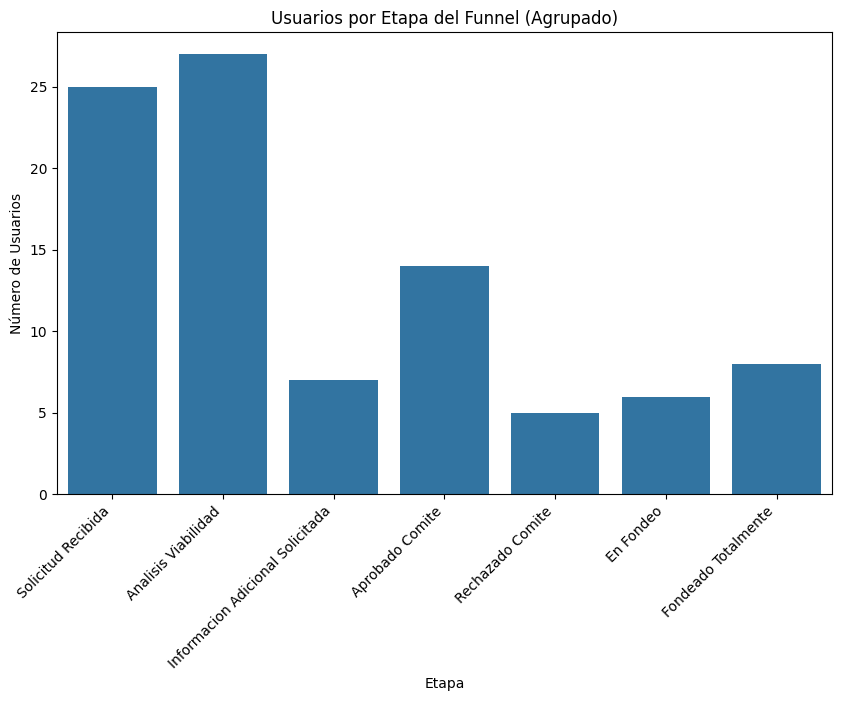

In [47]:
# Preparar datos para la visualización agrupando "En Fondeo"
df['Etapa_Funnel_Agrupada'] = df['Etapa_Funnel'].replace(to_replace=r'En Fondeo \(Camp\.\s*\d+\)', value='En Fondeo', regex=True)

# Definir el nuevo orden de las etapas, con "En Fondeo" agrupado
orden_etapas_agrupado = ['Solicitud Recibida', 'Analisis Viabilidad', 'Informacion Adicional Solicitada', 'Aprobado Comite', 'Rechazado Comite', 'En Fondeo', 'Fondeado Totalmente']

# Visualización del funnel con orden específico y "En Fondeo" agrupado usando seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Etapa_Funnel_Agrupada', order=orden_etapas_agrupado)
plt.title('Usuarios por Etapa del Funnel (Agrupado)')
plt.xlabel('Etapa')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=45, ha='right')
plt.show()

## Análisis de la Distribución de Usuarios por Etapa

Al revisar la tabla de usuarios por etapa del funnel, se observa una concentración significativa en las fases iniciales: "Solicitud Recibida" y "Análisis de Viabilidad".

Un punto que destaca y requiere investigación es por qué la etapa "Análisis de Viabilidad" presenta un número de usuarios superior a "Solicitud Recibida", siendo esta última teóricamente una fase previa. Esta situación podría deberse a múltiples factores, como puntos de entrada alternativos al funnel o particularidades en el registro de datos.

A partir de estas observaciones iniciales, surgen las siguientes preguntas analíticas:
1.  ¿Cuál es el origen de la discrepancia en el conteo de usuarios entre "Solicitud Recibida" y "Análisis de Viabilidad"? *(Nota: Aunque esta pregunta es importante, para los fines de este análisis subsecuente, nos centraremos en la temporalidad).*
2.  ¿Cuánto tiempo transcurre, en promedio, para que una solicitud sea analizada desde el momento de su recepción?

Procederemos a investigar la segunda cuestión para entender mejor la eficiencia de esta fase del embudo.

In [48]:
# Tiempo transurrido entre cada etapa
df['Tiempo_Transcurrido'] = (df['Fecha_Etapa'] - df['Fecha_Solicitud']).dt.days

In [49]:
# Número de dias que se tarda en pasar una solicitud a cada etapa
df.groupby('Etapa_Funnel_Agrupada')['Tiempo_Transcurrido'].mean()

,Tiempo_Transcurrido
Etapa_Funnel_Agrupada,
Analisis Viabilidad,6.740741
Aprobado Comite,15.428571
En Fondeo,42.833333
Fondeado Totalmente,42.750000
Informacion Adicional Solicitada,7.285714
Rechazado Comite,13.400000
Solicitud Recibida,0.000000


# Identificación de Oportunidades de Optimización en el Funnel

Un hallazgo clave en el análisis temporal de nuestro funnel es el lapso promedio de **casi 7 días** que transcurre desde la "Recepción de la Solicitud" hasta que se completa el "Análisis de Viabilidad". Este periodo podría representar una espera considerable para el usuario antes de recibir una primera respuesta sobre su solicitud.

Este tiempo de procesamiento sugiere la importancia de:
1.  **Revisar los procesos internos** actuales en esta transición del funnel.
2.  **Colaborar con los equipos encargados** de estas etapas para identificar cuellos de botella y explorar estrategias de mejora.

Una **idea accionable específica** se relaciona con la etapa o subproceso donde se solicita "Información Adicional" al usuario. Aunque se menciona que la transición *hacia* una solicitud de información adicional puede tomar solo 1 día, es crucial analizar:
* **Cuáles son los motivos recurrentes** por los que se requiere esta información complementaria.
* La viabilidad de **integrar mecanismos de validación o recolección proactiva** de estos datos al inicio del funnel, idealmente durante la "Recepción de la Solicitud".

El objetivo de esta optimización sería **reducir el tiempo total en la fase de "Análisis de Viabilidad"** o, idealmente, minimizar o eliminar la necesidad de un paso explícito de solicitud de información adicional, agilizando así la experiencia del prospecto.

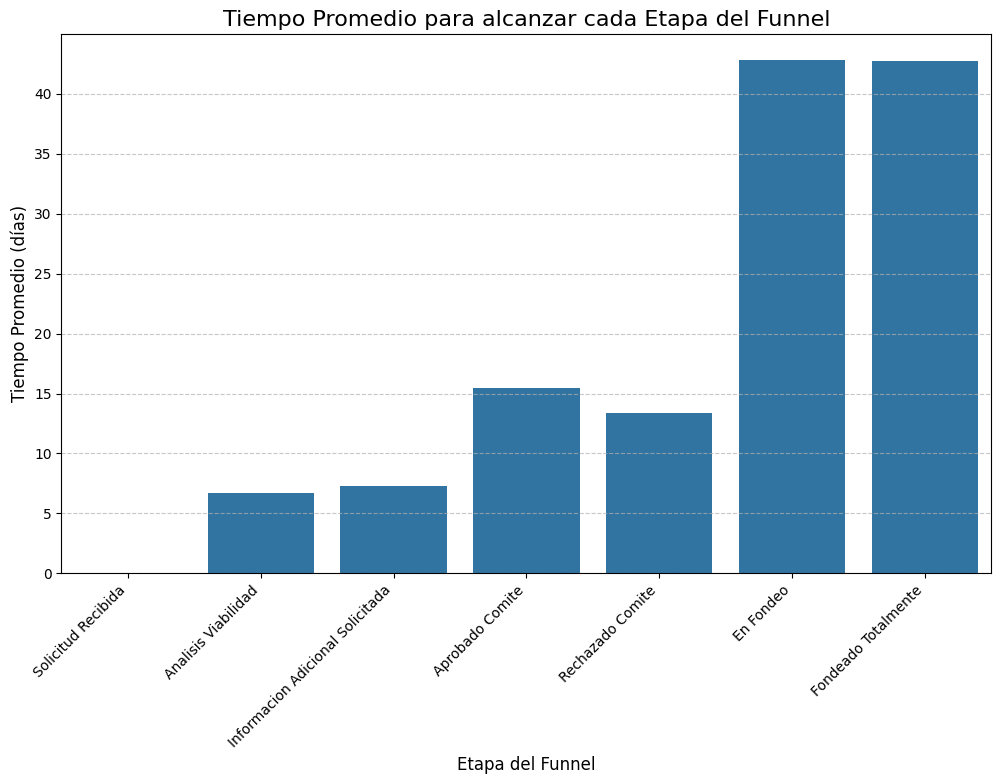

In [50]:
# Calculamo el tiempo promedio por etapa del funnel agrupada
tiempo_promedio_por_etapa_agrupada = df.groupby('Etapa_Funnel_Agrupada')['Tiempo_Transcurrido'].mean().reset_index()

# Visualiza el tiempo promedio por etapa
plt.figure(figsize=(12, 7))
sns.barplot(data=tiempo_promedio_por_etapa_agrupada,
            x='Etapa_Funnel_Agrupada',
            y='Tiempo_Transcurrido',
            order=orden_etapas_agrupado)

plt.title('Tiempo Promedio para alcanzar cada Etapa del Funnel', fontsize=16)
plt.xlabel('Etapa del Funnel', fontsize=12)
plt.ylabel('Tiempo Promedio (días)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X para que sean legibles
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula suave en el eje Y
plt.show()

# Distribución de Montos Solicitados por Desarrolladores y Valores Atípicos

La gráfica de distribución correspondiente a los montos solicitados por los desarrolladores revela claramente la presencia de valores atípicos. Entre estos, destaca que el proyecto con la solicitud de financiamiento más elevada pertenece al tipo "Tecnología".

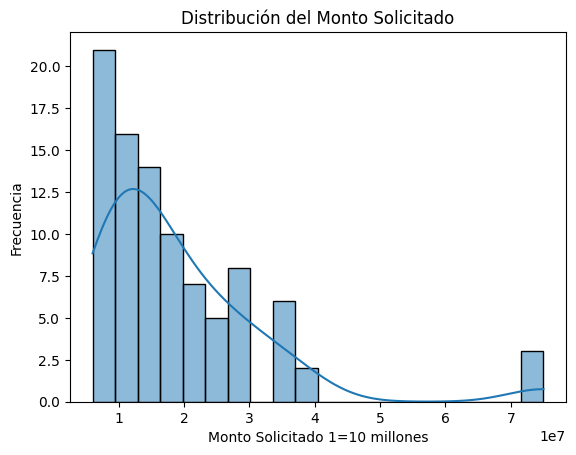

In [51]:
# Monto solicitado
sns.histplot(data=df, x='Monto_Solicitado_MXN', bins=20, kde=True)
plt.title('Distribución del Monto Solicitado')
plt.xlabel('Monto Solicitado 1=10 millones')
plt.ylabel('Frecuencia')
plt.show()
#

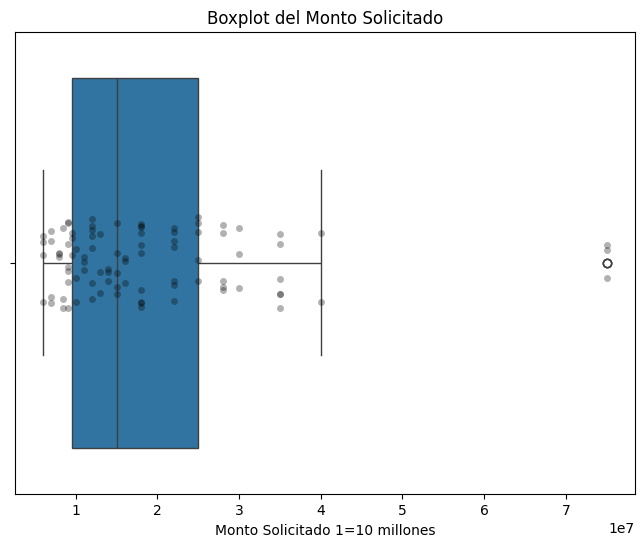

In [52]:
#Boxplot para ver valores atipicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Monto_Solicitado_MXN')
sns.stripplot(data=df, x='Monto_Solicitado_MXN', color='black', alpha=0.3)
plt.title('Boxplot del Monto Solicitado')
plt.xlabel('Monto Solicitado 1=10 millones')
plt.show()

In [53]:
# Identificar outlier
outliers = df[df['Monto_Solicitado_MXN'] > 40000000]
outliers

,ID_Proyecto,Nombre_Proyecto,Desarrollador,Tipo_Proyecto,Region_Proyecto,Fecha_Solicitud,Monto_Solicitado_MXN,Etapa_Funnel,Fecha_Etapa,Responsable,...,Publicado_Plataforma,ID_Campana,Fecha_Inicio_Campana,Meta_Campana_MXN,Monto_Fondeado_Campana_MXN,Fecha_Cierre_Campana,Estatus_Campana,Total_Inversionistas_Campana,Etapa_Funnel_Agrupada,Tiempo_Transcurrido
76,PROY021,Centro de Datos Tier III,DataCore Solutions,Tecnologia,Monterrey,2024-05-20,75000000,Solicitud Recibida,2024-05-20,Sofia Hernandez,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,Solicitud Recibida,0
77,PROY021,Centro de Datos Tier III,DataCore Solutions,Tecnologia,Monterrey,2024-05-20,75000000,Analisis Viabilidad,2024-05-28,Sofia Hernandez,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,Analisis Viabilidad,8
78,PROY021,Centro de Datos Tier III,DataCore Solutions,Tecnologia,Monterrey,2024-05-20,75000000,Informacion Adicional Solicitada,2024-05-30,Sofia Hernandez,...,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,Informacion Adicional Solicitada,10


# Conclusiones del Análisis del Funnel de Ventas

El presente análisis se centró en el funnel de ventas de una plataforma fintech de crowdfunding inmobiliario, utilizando un conjunto de datos ficticios con fines educativos y demostrativos. El objetivo fue identificar puntos clave, cuellos de botella y oportunidades de optimización en el recorrido de las solicitudes de proyectos.

## Hallazgos Principales:

1.  **Estructura del Funnel y Distribución de Solicitudes:**
    * El funnel de ventas analizado se compone de las siguientes etapas principales (agrupando campañas de fondeo): "Solicitud Recibida", "Análisis de Viabilidad", "Información Adicional Solicitada", "Aprobado Comité", "Rechazado Comité", "En Fondeo" y "Fondeado Totalmente".
    * Las etapas iniciales, "Solicitud Recibida" y "Análisis de Viabilidad", concentran el mayor volumen de proyectos (ambas con 27 proyectos en el dataset analizado). Esto es esperable, ya que representan la entrada al embudo.
    * Posteriormente, se observa una disminución de proyectos, con 21 aprobados por el comité y 5 rechazados, mientras que 7 requirieron información adicional. De los aprobados, 24 entradas corresponden a etapas de "En Fondeo" (considerando que un proyecto puede tener múltiples campañas) y 16 proyectos alcanzaron el estado de "Fondeado Totalmente".

2.  **Análisis Temporal del Funnel:**
    * Un hallazgo significativo es el tiempo promedio que transcurre entre las etapas iniciales. Desde la "Recepción de la Solicitud" hasta que se completa el "Análisis de Viabilidad", pasan en promedio **casi 7 días** (6.74 días).
    * Si se requiere "Información Adicional", el tiempo promedio desde la solicitud inicial hasta esta etapa es de aproximadamente **7.3 días**.
    * Para que un proyecto sea "Aprobado por el Comité" transcurren, en promedio, unos **15.4 días** desde la solicitud inicial.
    * El tiempo promedio para que un proyecto alcance la etapa de "En Fondeo" es de aproximadamente **42.8 días**, y para ser "Fondeado Totalmente" es similar, **42.75 días** desde la recepción de la solicitud.
    * El lapso de casi 7 días para el "Análisis de Viabilidad" y la extensión a más de dos semanas para la aprobación del comité son puntos que podrían investigarse para buscar optimizaciones y reducir los tiempos de espera para los desarrolladores.

3.  **Análisis del Monto Solicitado:**
    * La distribución de los montos solicitados por los desarrolladores presenta un sesgo hacia la derecha, con la presencia de valores atípicos significativos.
    * Se identificó que el proyecto con la mayor solicitud de financiamiento (75,000,000 MXN) corresponde al tipo "Tecnología" (específicamente, un centro de datos). Este tipo de proyectos podría, por su naturaleza, requerir inversiones considerablemente más altas que otros tipos de desarrollos inmobiliarios.

## Ideas Accionables y Recomendaciones:

Basado en los hallazgos, se proponen las siguientes líneas de acción:

* **Optimizar el Tiempo de Análisis Inicial:** El periodo de casi 7 días para el "Análisis de Viabilidad" merece una revisión de los procesos internos. Sería beneficioso colaborar con los equipos responsables para identificar posibles cuellos de botella.
* **Eficiencia en la Solicitud de Información Adicional:** Aunque la transición hacia la solicitud de "Información Adicional" no añade un tiempo excesivo por sí misma (aproximadamente medio día después del análisis de viabilidad inicial), sería valioso investigar los motivos recurrentes de estas solicitudes. Integrar mecanismos para la recolección proactiva de esta información en la etapa de "Recepción de la Solicitud" podría reducir el tiempo total del proceso y agilizar la experiencia del desarrollador.
* **Gestión y Análisis de Proyectos de Alto Monto:** Dada la influencia de proyectos de alto monto (como el de "Tecnología") en la distribución de montos solicitados, sería pertinente analizar si estos proyectos requieren un carril de análisis diferenciado o si sus características justifican los montos y tiempos observados.

## Limitaciones y Próximos Pasos:

Es crucial recordar que este análisis se realizó sobre datos ficticios. Un estudio con datos reales permitiría validar estos hallazgos y profundizar en las particularidades del funnel.

Como próximos pasos, se podría:
* Analizar las tasas de conversión entre cada etapa del funnel.
* Segmentar el análisis por `Tipo_Proyecto`, `Region_Proyecto` o `Desarrollador` para identificar patrones específicos.
* Investigar las causas de rechazo en la etapa "Rechazado Comité".
* Evaluar el rendimiento de las campañas de fondeo (duración, monto fondeado vs. meta, número de inversionistas).

Este análisis exploratorio proporciona una base inicial para entender la dinámica del funnel de ventas y destaca áreas clave donde la optimización de procesos y la toma de decisiones basada en datos pueden tener un impacto significativo en la eficiencia de la plataforma de crowdfunding inmobiliario.